# CIND820 Analytics Project
# Controlling a Pandemic: Analyzing Key Factors in COVID-19 Outcomes by Country
Dataset: Our world in COVID-19

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

#Visualization
#!pip install plotly_express
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling and evaluation
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [107]:
OWIDdf = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')

In [108]:
OWIDdf.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [180]:
#The location column contains continent and country values, but we are only interested in countries
OWIDdf = OWIDdf[-OWIDdf.location.isin(['World', 'South America','North America','Asia','Africa','Europe','Australiasia','Antarctica','European Union'])]

In [168]:
OWIDdf.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.126800e+04,71263.000000,70298.000000,62136.000000,62194.000000,70298.000000,70866.000000,70861.000000,69901.000000,61747.000000,...,67776.000000,46111.000000,68394.000000,69276.000000,53660.000000,52917.000000,34124.000000,62551.000000,70712.000000,68337.000000
mean,2.500121e+05,2009.421144,2012.483992,7560.426162,51.944014,45.520526,7739.113806,66.795824,66.664464,179.924559,...,19174.885330,13.313368,257.391972,7.794138,10.581282,32.632604,50.887803,3.038005,73.145857,0.727781
std,1.409119e+06,11174.505963,10939.432151,33380.476616,244.299506,217.915320,15369.787249,170.648319,143.290071,324.915859,...,19806.395995,20.010997,118.823666,3.953123,10.443937,13.518449,31.945490,2.475256,7.574464,0.150612
min,1.000000e+00,-74347.000000,-6223.000000,1.000000,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.057500e+02,1.000000,5.429000,35.000000,0.000000,0.000000,146.122500,0.103000,0.963000,5.628000,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.400000,19.351000,1.300000,67.440000,0.602000
50%,7.259500e+03,50.000000,62.000000,221.500000,1.000000,0.857000,1046.220000,5.807000,7.940000,30.090000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.750000
75%,7.429250e+04,563.000000,587.429000,1901.000000,13.000000,9.857000,7100.113000,55.548000,63.082000,185.006000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,2.943878e+07,300416.000000,250743.571000,576013.000000,5016.000000,3572.000000,145809.875000,8652.658000,2648.773000,2268.843000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [169]:
OWIDdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72412 entries, 0 to 74865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               72412 non-null  object        
 1   continent                              71169 non-null  object        
 2   location                               72412 non-null  object        
 3   date                                   72412 non-null  datetime64[ns]
 4   total_cases                            71268 non-null  float64       
 5   new_cases                              71263 non-null  float64       
 6   new_cases_smoothed                     70298 non-null  float64       
 7   total_deaths                           62136 non-null  float64       
 8   new_deaths                             62194 non-null  float64       
 9   new_deaths_smoothed                    70298 non-null  float6

# Data Preprocessing

In [111]:
OWIDdf.isnull().sum()

iso_code                                     0
continent                                 3697
location                                     0
date                                         0
total_cases                               1147
new_cases                                 1149
new_cases_smoothed                        2150
total_deaths                             10376
new_deaths                               10218
new_deaths_smoothed                       2150
total_cases_per_million                   1549
new_cases_per_million                     1551
new_cases_smoothed_per_million            2547
total_deaths_per_million                 10765
new_deaths_per_million                   10607
new_deaths_smoothed_per_million           2547
reproduction_rate                        14478
icu_patients                             67107
icu_patients_per_million                 67107
hosp_patients                            65529
hosp_patients_per_million                65529
weekly_icu_ad

In [170]:
###Removing columns where na is more than 50000

owiddfn = OWIDdf.loc[:, OWIDdf.isna().sum() < 50000]

In [171]:
###new_test features removed as they will correlate with total_test

owiddfn = owiddfn[owiddfn.columns.difference(owiddfn.filter(like='new').columns,sort=False)]

In [173]:
###Removing redundant columns/ with high correlation
owiddfn = owiddfn.drop(columns=['total_cases','total_deaths','total_tests','aged_65_older','aged_70_older','iso_code','continent'])

KeyError: "['total_cases' 'total_deaths' 'total_tests' 'aged_65_older'\n 'aged_70_older' 'iso_code' 'continent'] not found in axis"

In [174]:
owiddfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72412 entries, 0 to 74865
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    72412 non-null  object        
 1   date                        72412 non-null  datetime64[ns]
 2   total_cases_per_million     70866 non-null  float64       
 3   total_deaths_per_million    61747 non-null  float64       
 4   reproduction_rate           59972 non-null  float64       
 5   total_tests_per_thousand    33928 non-null  float64       
 6   positive_rate               37720 non-null  float64       
 7   tests_per_case              37141 non-null  float64       
 8   tests_units                 40326 non-null  object        
 9   stringency_index            64056 non-null  float64       
 10  population                  72001 non-null  float64       
 11  population_density          69522 non-null  float64   

In the earlier stages of the pandemic, there was a lot of missing or underreported information.

In [175]:
odf = owiddfn.copy()


#Removing rows from Jan 2020 as there was a lot of underreported data
odf.date = pd.to_datetime(odf.date)
earliest_date = odf.date.min()
odf = odf.loc['2020-02-01':] #February 2020 and beyond
odf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53026 entries, 20200 to 74865
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    53026 non-null  object        
 1   date                        53026 non-null  datetime64[ns]
 2   total_cases_per_million     51749 non-null  float64       
 3   total_deaths_per_million    44591 non-null  float64       
 4   reproduction_rate           43179 non-null  float64       
 5   total_tests_per_thousand    26328 non-null  float64       
 6   positive_rate               29204 non-null  float64       
 7   tests_per_case              28656 non-null  float64       
 8   tests_units                 30921 non-null  object        
 9   stringency_index            46104 non-null  float64       
 10  population                  52615 non-null  float64       
 11  population_density          50159 non-null  float6

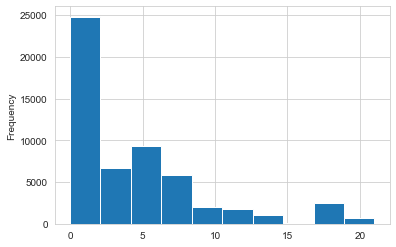

In [117]:
odf.isnull().sum(axis = 1).plot(kind='hist')

In [118]:
#Remove rows with 5+ NAs
odf = odf[odf.isnull().sum(axis=1) < 5]

In [119]:
#Removing NA from dependent variables

odf = odf[odf['total_cases_per_million'].notna()]
odf = odf[odf['total_deaths_per_million'].notna()]
odf = odf[odf['reproduction_rate'].notna()]

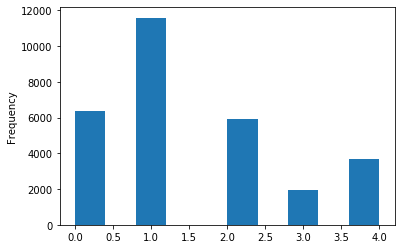

In [15]:
odf.isnull().sum(axis = 1).plot(kind='hist')

In [120]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29483 entries, 20218 to 74863
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    29483 non-null  object        
 1   date                        29483 non-null  datetime64[ns]
 2   total_cases_per_million     29483 non-null  float64       
 3   total_deaths_per_million    29483 non-null  float64       
 4   reproduction_rate           29483 non-null  float64       
 5   total_tests_per_thousand    23689 non-null  float64       
 6   positive_rate               26294 non-null  float64       
 7   tests_per_case              26206 non-null  float64       
 8   tests_units                 26445 non-null  object        
 9   stringency_index            28528 non-null  float64       
 10  population                  29483 non-null  float64       
 11  population_density          29483 non-null  float6

In [17]:
'''
np.unique(odf.location)
country_subset = ['Canada','United States','Vietnam','United Kingdom','Uganda','Thailand','Indonesia','Italy',
                  'Jamaica','Japan','Philippines','Poland','Ghana','Greece','Colombia','China',
                 'Brazil','South Korea','New Zealand','Russia','Libya','Botswana']'''

"\nnp.unique(odf.location)\ncountry_subset = ['Canada','United States','Vietnam','United Kingdom','Uganda','Thailand','Indonesia','Italy',\n                  'Jamaica','Japan','Philippines','Poland','Ghana','Greece','Colombia','China',\n                 'Brazil','South Korea','New Zealand','Russia','Libya','Botswana']"

# Imbalanced Target Data 

Much of the target variables have sparse data or are heavily imbalanced and must be further processed to yield more realistic results. SMOGN will later be used to solve this problem

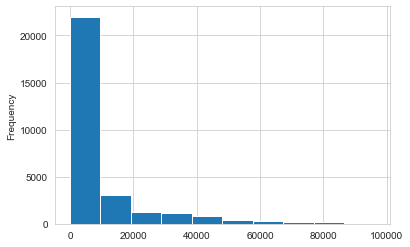

In [121]:
#Total_cases_per_million
#Imbalanced data?
odf.total_cases_per_million.plot(kind='hist')

In [122]:
odf[odf.total_cases_per_million < 10000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22286 entries, 20218 to 74863
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    22286 non-null  object        
 1   date                        22286 non-null  datetime64[ns]
 2   total_cases_per_million     22286 non-null  float64       
 3   total_deaths_per_million    22286 non-null  float64       
 4   reproduction_rate           22286 non-null  float64       
 5   total_tests_per_thousand    17621 non-null  float64       
 6   positive_rate               19496 non-null  float64       
 7   tests_per_case              19408 non-null  float64       
 8   tests_units                 19630 non-null  object        
 9   stringency_index            21853 non-null  float64       
 10  population                  22286 non-null  float64       
 11  population_density          22286 non-null  float6

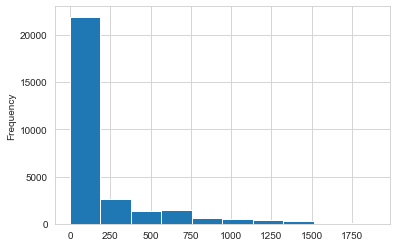

In [123]:
#total_deaths_per_million
#Imbalanced
odf.total_deaths_per_million.plot(kind='hist')

6.73


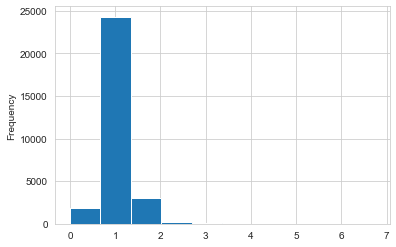

In [124]:
#Looking at the distribution of reproduction_rate
odf.reproduction_rate.plot(kind ='hist')
print(odf.reproduction_rate.max())

# Exploratory Data Analysis 

In [26]:
odf.corr()

,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,positive_rate,tests_per_case,stringency_index,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases_per_million,1.000000,0.794825,-0.101335,0.623425,0.158689,-0.086187,0.099879,-0.069360,0.031807,0.290051,0.331688,-0.280246,-0.159827,0.153326,0.269350,0.044937,0.344480,0.133104,0.317444,0.343915
total_deaths_per_million,0.794825,1.000000,-0.076497,0.329876,0.228323,-0.094805,0.123192,-0.036077,-0.075208,0.324160,0.167548,-0.293471,-0.192784,-0.003515,0.362206,-0.012498,0.291408,0.130680,0.313143,0.330230
reproduction_rate,-0.101335,-0.076497,1.000000,-0.072971,0.083477,-0.120327,0.076986,0.039879,-0.023945,0.112796,0.051210,-0.162871,-0.007587,0.051590,0.084565,0.056677,0.082909,0.086086,0.092543,0.115055
total_tests_per_thousand,0.623425,0.329876,-0.072971,1.000000,-0.163887,0.033120,-0.077109,-0.080341,0.150147,0.244812,0.441332,-0.211995,-0.140232,0.127244,0.194745,0.024765,0.331128,0.067400,0.298394,0.350057
positive_rate,0.158689,0.228323,0.083477,-0.163887,1.000000,-0.161491,0.250842,-0.003923,-0.105812,-0.171525,-0.226244,-0.003307,0.073802,0.067325,-0.091870,-0.057389,0.122732,-0.152493,-0.122177,-0.146110
tests_per_case,-0.086187,-0.094805,-0.120327,0.033120,-0.161491,1.000000,-0.089627,-0.032690,0.142384,0.068932,0.095143,-0.061070,-0.100073,0.004848,-0.007663,-0.057381,0.072467,-0.009809,0.111401,0.100968
stringency_index,0.099879,0.123192,0.076986,-0.077109,0.250842,-0.089627,1.000000,0.103059,-0.013693,0.010507,0.010800,-0.260107,-0.105074,0.212762,-0.050952,0.039911,0.328996,-0.168836,0.129374,0.102964
population,-0.069360,-0.036077,0.039879,-0.080341,-0.003923,-0.032690,0.103059,1.000000,0.008923,-0.092640,-0.109647,0.042404,0.067096,0.101404,-0.145468,-0.032658,0.018974,-0.122825,-0.128548,-0.118254
population_density,0.031807,-0.075208,-0.023945,0.150147,-0.105812,0.142384,-0.013693,0.008923,1.000000,0.103564,0.282438,-0.018574,-0.164650,0.180467,-0.094590,0.019728,0.056276,-0.027360,0.155050,0.120175
median_age,0.290051,0.324160,0.112796,0.244812,-0.171525,0.068932,0.010507,-0.092640,0.103564,1.000000,0.585727,-0.699459,-0.237923,0.175786,0.738205,0.324175,0.779848,0.699065,0.843588,0.884053


Text(0.5, 1, 'OWID COVID Correlation Heatmap')

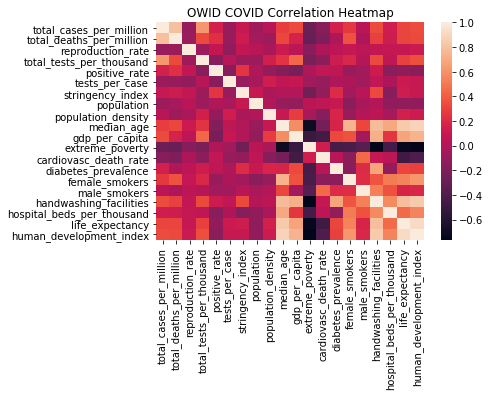

In [27]:
hmp = sns.heatmap(odf.corr())
hmp.set_title('OWID COVID Correlation Heatmap')

Text(0.5, 1, 'Features correlating with total_cases')

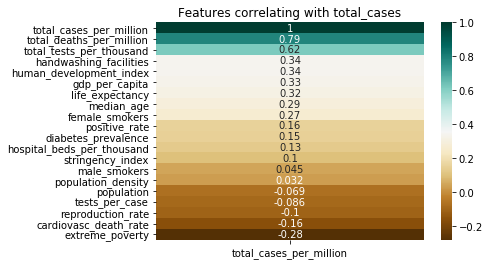

In [28]:
dhmp = sns.heatmap(odf.corr()[['total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_cases')

Text(0.5, 1, 'Features correlating with total_deaths')

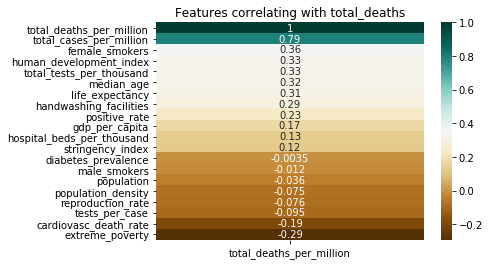

In [29]:
dhmp = sns.heatmap(odf.corr()[['total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False), annot=True, cmap='BrBG')
dhmp.set_title('Features correlating with total_deaths')

In [54]:
nowiddfn = odf.select_dtypes(include='float64')
#ppdf = sns.pairplot(nowiddfn.sample(1000))
#ppdf.savefig("pairplotowid.png")

Some of the target variables to consider: reproduction_rate, total_cases_per_million, total_deaths_per_million.
Normally we would also consider crude mortality rate or case-fatality rate as well. However, confirmed cases is often underreported AND undertested and as such may be harder to evaluate accurately. It is important to consider that the data being robust and accurate relies heavily on the nation's testing capacity. 

Remember that the reproduction rate (R) describes the trajectory of the virus. A value of R = 1 means the amount of new infections and new recoveries are equal; meaning the virus numbers will stagnate. A value of 6.74 means the number of infected is sharply increasing and may lead in a big spike of infections and deaths, depending on government mitigation strategy.

In [17]:
print(OWIDdf.reproduction_rate.max())
odf[odf.reproduction_rate==OWIDdf.reproduction_rate.max()]

6.72


,location,date,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
61437,South Korea,2020-02-22,8.446,0.039,6.72,0.383,0.033,29.9,people tested,45.37,...,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916


# Calculating Crude Mortality/Case-Fatality

In [29]:
odfdt.date.max()

Timestamp('2021-03-13 00:00:00')

In [213]:
#Most recent data
odfdt = OWIDdf.copy()
odfdt['date'] = pd.to_datetime(odfdt['date'])
most_recent_date = odf.date.max();

odfdt = odfdt[odfdt.date == most_recent_date]

In [182]:
OWIDdf.date = pd.to_datetime(OWIDdf.date)

In [178]:
#Calculating Crude Mortality (COVID deaths/population) and CaseFatality (COVID deaths/COVID cases)
SK_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].population)
SK_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].total_cases)

SK_Median_age = OWIDdf[(OWIDdf.location == 'South Korea') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" South Korea Crude Mortality:",SK_Covid_Crude_Mortality.iloc[0],"%\n","South Korea Case-Fatality: ",SK_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", SK_Median_age)

 South Korea Crude Mortality: 3.267069810728211e-05 %
 South Korea Case-Fatality:  0.017444827478467356 %
 Median Age: 43.4


South Korea reported one of the largest spikes in the early stages of the pandemic, yet they are one of the countries with the lowest COVID-19 Mortality, which may be attributed to hospital bed capacity.

In [158]:
ITA_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].population)
ITA_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].total_cases)

ITA_Median_age = OWIDdf[(OWIDdf.location == 'Italy') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" Italy Crude Mortality:",ITA_Covid_Crude_Mortality.iloc[0],"%\n","Italy Case-Fatality: ",ITA_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", ITA_Median_age )

 Italy Crude Mortality: 0.0016850466380209344 %
 Italy Case-Fatality:  0.03181953615392159 %
 Median Age: 47.9


Italy may have suffered more loss due to their higher median age.


In [159]:
US_Covid_Crude_Mortality = (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].population)
US_Covid_CaseFatality = (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_deaths) / (OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].total_cases)

US_Median_age = OWIDdf[(OWIDdf.location == 'United States') & (OWIDdf.date == most_recent_date)].median_age.iloc[0]
print(" United States Crude Mortality:",US_Covid_Crude_Mortality.iloc[0],"%\n","United States Case-Fatality: ",US_Covid_CaseFatality.iloc[0],"%\n", "Median Age:", US_Median_age )

 United States Crude Mortality: 0.0016142348251372142 %
 United States Case-Fatality:  0.01817367176733036 %
 Median Age: 38.3


Crude Mortality or Case fatality may be used a generated target feature.

# Visualizations

A look into total cases by location. Note that total cases cannot alone represent a good target variable as an absolute value hence a relative value total_cases_per_million is used

Text(0.5, 1.0, 'Relative frequency graph of Total cases worldwide')

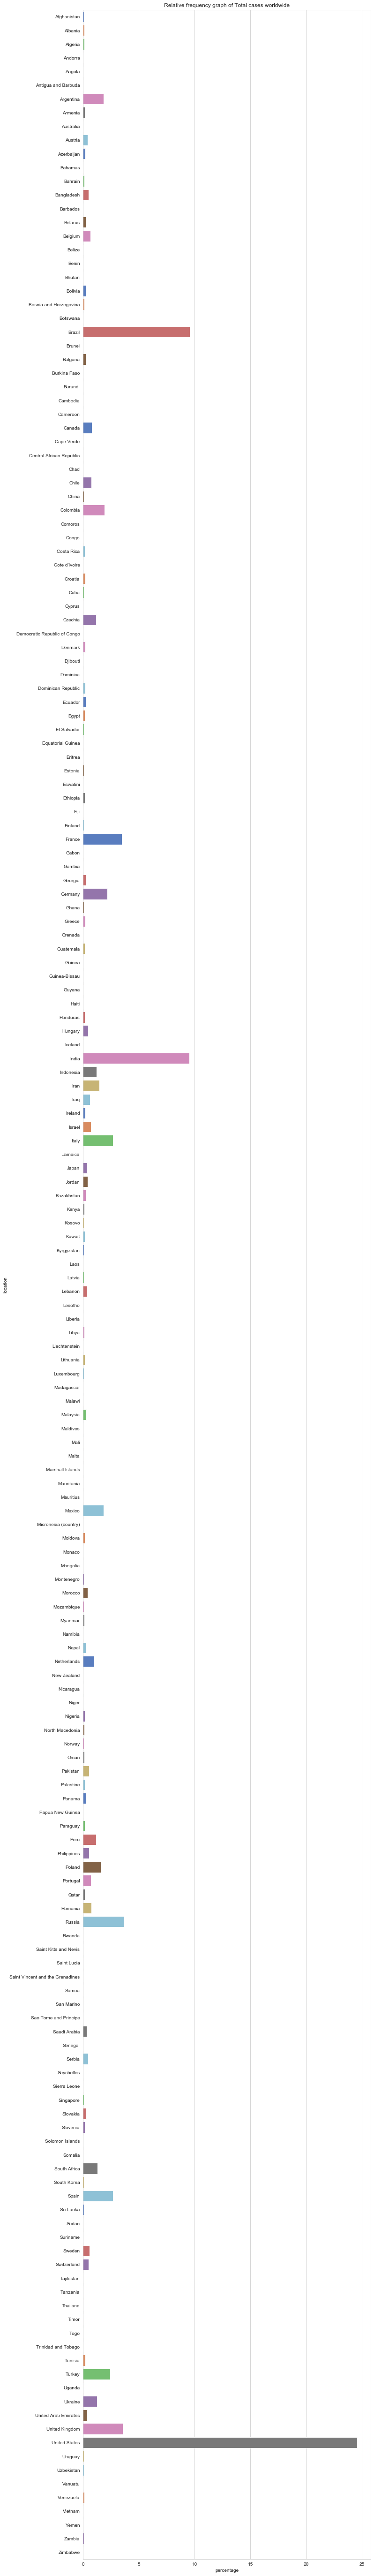

In [230]:
countries = odfdt.groupby('location')['total_cases'].sum()

countries_per = countries.groupby('location').agg(percentage =('total_cases', lambda p: p.sum() / countries.sum() * 100)).round(2)

sns.set_style("whitegrid")
bar, ax = plt.subplots(figsize=(11,100))
ax = sns.barplot(x="percentage",y=countries_per.index, data=countries_per, ci=None, palette='muted', orient = 'h')
ax.set_title("Relative frequency graph of Total cases worldwide")

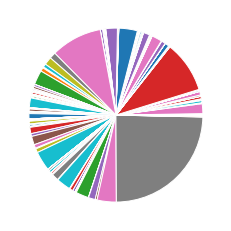

In [231]:
plt.pie(countries)
plt.show()

Text(0.5, 1.0, 'Relative frequency graph of Total cases per million')

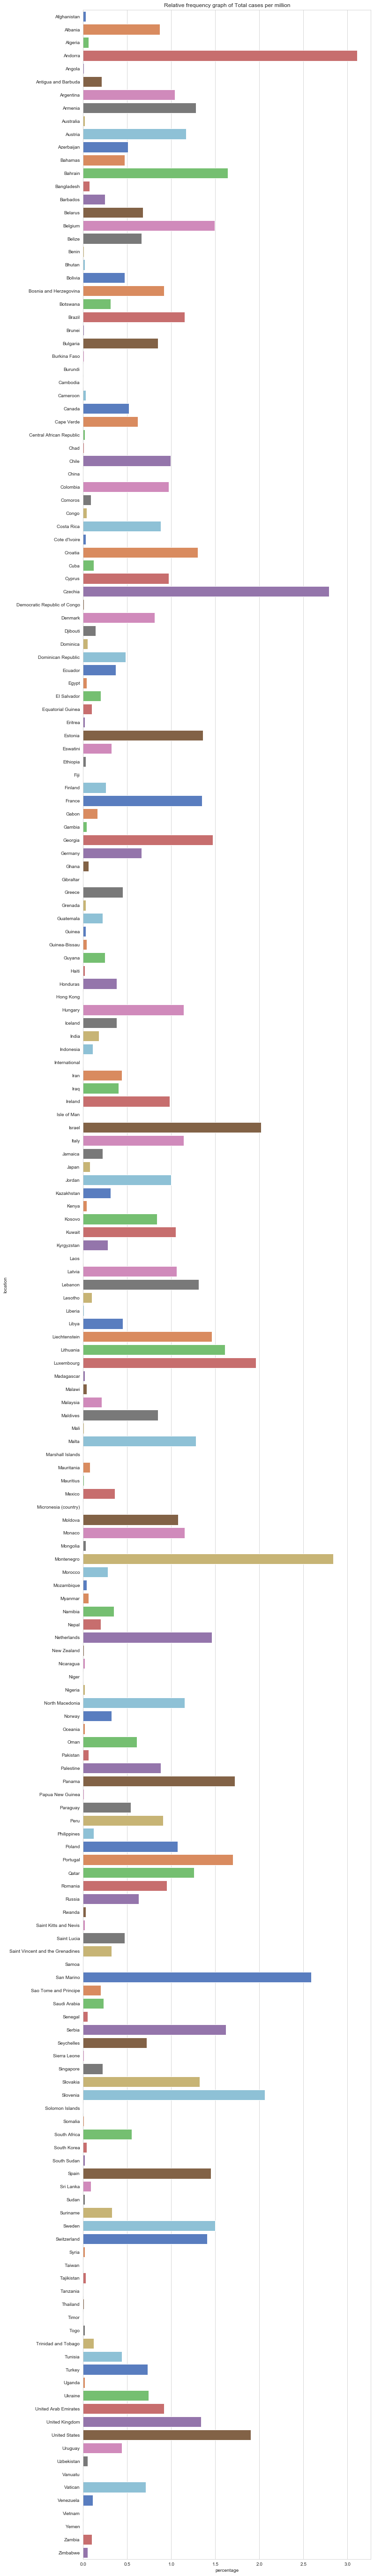

In [200]:
countries = odfdt.groupby('location')['total_cases_per_million'].sum()
countries_per = countries.groupby('location').agg(percentage =('total_cases_per_million', lambda p: p.sum() / countries.sum() * 100)).round(2)

sns.set_style("whitegrid")
bar, ax = plt.subplots(figsize=(11,100))
ax = sns.barplot(x="percentage",y=countries_per.index, data=countries_per, ci=None, palette='muted', orient = 'h')
ax.set_title("Relative frequency graph of Total cases per million")

In [190]:
OWIDdf[OWIDdf.location=='Czechia'].tail(1)[['location','total_cases_per_million','new_cases_per_million','total_cases','population','total_deaths']]


,location,total_cases_per_million,new_cases_per_million,total_cases,population,total_deaths
17933,Czechia,130645.284,650.856,1399078.0,10708982.0,23226.0


In [193]:
OWIDdf[OWIDdf.location=='Andorra'].tail(1)[['location','total_cases_per_million','new_cases_per_million','total_cases','population','total_deaths']]

,location,total_cases_per_million,new_cases_per_million,total_cases,population,total_deaths
1926,Andorra,145809.875,491.814,11266.0,77265.0,113.0


if the population of the country is under 1 million, the value of total_cases_per_million is scaled up proportionally.b

In [214]:
odfdt = odfdt[odfdt['total_cases_per_million'].notna()]
odfdt = odfdt[odfdt['population_density'].notna()]

In [217]:
odfdt.population_density.max()

19347.5

In [232]:
px.scatter(odfdt,x='total_cases_per_million',y='population_density', size = 'population_density',
           color='location', hover_data=['location'],
           title='Population density vs total_cases_per_million')

Countries with very small populations tend to have very high total_cases_per_million values, indicating that they may be over-extrapolated. These values may be removed later.

# Modeling 

### One Hot Encoding for the Random Forest (***may not be used, ignore for now)

In [120]:

y=odf2.total_deaths_per_million
X=odf2[odf2.columns.difference(['total_deaths_per_million','total_cases_per_million','date','tests_units','continent'])]

odf2_onehot = odf2.copy()
odf2_onehot = pd.get_dummies(odf2, columns = str_cols, prefix = str_cols)
odf2_onehot

In [58]:
str_cols = X.select_dtypes(include="object").columns.to_list()
str_cols

odf_onehot = odf.copy()
odf_onehot = pd.get_dummies(odf, columns=str_cols, prefix = str_cols)
odf_onehot

y=odf_onehot.total_deaths_per_million
X=odf_onehot[odf_onehot.columns.difference(['total_deaths_per_million','total_cases_per_million','date','tests_units','continent'])]
#X_o = X.fillna(X.median())

# Random Forest Regressor

In [20]:
y=odf.total_deaths_per_million
#y=odf.total_cases_per_million
#y=odf.reproduction_rate

X=odf[odf.columns.difference(['total_deaths_per_million','total_cases_per_million','date',
                              'tests_units','continent','location','reproduction_rate'])] 

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(train_X)
train_X = imp.transform(train_X)

valimp = SimpleImputer(missing_values=np.nan, strategy='median')
valimp = valimp.fit(val_X)
val_X = valimp.transform(val_X)
##train_y2 = train_y.fillna(train_y.median())

In [27]:
clf = RandomForestRegressor(n_estimators=100, bootstrap = True, random_state = 1)
clf = clf.fit(train_X, train_y)

In [28]:
print('R^2 training set: {:.2f} \nR^2 val set: {:.2f}'.format(clf.score(train_X, train_y),clf.score(val_X, val_y)))


R^2 training set: 1.00 
R^2 val set: 0.97


In [29]:
val_pred = clf.predict(val_X)
val_mae = mean_absolute_error(val_pred, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 13


Extremely high R^2 score and very low MAE suggests severe overfitting of the model 

Feature ranking:
1 	 total_tests_per_thousand 0.30238333179499766
2 	 stringency_index 0.1266759423501055
3 	 female_smokers 0.0993085604737081
4 	 median_age 0.057734203689935336
5 	 cardiovasc_death_rate 0.05572520461657179
6 	 extreme_poverty 0.04853498263097808
7 	 positive_rate 0.04468693442499092
8 	 tests_per_case 0.04082469200895188
9 	 male_smokers 0.034307003397373574
10 	 population_density 0.03411444064722002
11 	 population 0.031872302888283945
12 	 human_development_index 0.027927872882276456
13 	 hospital_beds_per_thousand 0.026200063056643633
14 	 diabetes_prevalence 0.02504891809667056
15 	 gdp_per_capita 0.021205684936216558
16 	 life_expectancy 0.01943986932645278
17 	 handwashing_facilities 0.0040099927786232


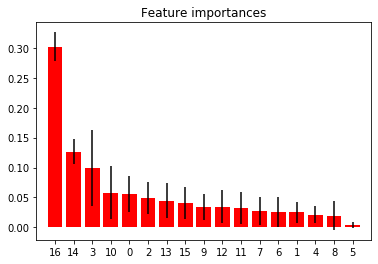

In [30]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range (train_X.shape[1]):
    featurelist = []
    featurelist.append(X.columns[indices[f]])
    print(f + 1,"\t", X.columns[indices[f]], importances[indices[f]])
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

The model itself is too biased for these feature importances to hold significance.

# SMOGN : Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise


The imbalanced data SMOGN technique

In [137]:
#!pip install smogn https://pypi.org/project/smogn/#files

# Multiple Regression 

In [67]:
model = sm.OLS(train_y, train_X).fit()

In [68]:
predictions = model.predict(train_X)

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     total_deaths_per_million   R-squared (uncentered):                   0.502
Model:                                  OLS   Adj. R-squared (uncentered):              0.501
Method:                       Least Squares   F-statistic:                              1694.
Date:                      Mon, 08 Mar 2021   Prob (F-statistic):                        0.00
Time:                              22:19:02   Log-Likelihood:                     -2.0113e+05
No. Observations:                     28642   AIC:                                  4.023e+05
Df Residuals:                         28625   BIC:                                  4.024e+05
Df Model:                                17                                                  
Covariance Type:                  nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2815      0.019    -14.998      0.000      -0.318      -0.245
x2            -5.9609      0.620     -9.613      0.000      -7.176      -4.745
x3            -1.1271      0.168     -6.729      0.000      -1.455      -0.799
x4             5.8149      0.267     21.775      0.000       5.291       6.338
x5            -0.0026      0.000    -18.965      0.000      -0.003      -0.002
x6             0.0513      0.117      0.439      0.661      -0.178       0.280
x7           -12.7636      1.024    -12.467      0.000     -14.770     -10.757
x8           302.5648     42.840      7.063      0.000     218.596     386.534
x9            -3.4154      0.422     -8.100      0.000      -4.242      -2.589
x10           -2.1206      0.170    -12.508      0.000      -2.453      -1.788
x11            8.6764      0.524     16.558      0.000       7.649       9.704
x12         3.419e-08   1.17e-08      2.912      0.004    1.12e-08    5.72e-08
x13           -0.0151      0.002     -6.541      0.000      -0.020      -0.011
x14          907.7020     18.085     50.191      0.000     872.255     943.149
x15            0.6867      0.096      7.147      0.000       0.498       0.875
x16           -0.0297      0.002    -13.881      0.000      -0.034      -0.026
x17            0.2984      0.006     53.010      0.000       0.287       0.309
==============================================================================
Omnibus:                    10250.210   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41180.748
Skew:                           1.756   Prob(JB):                         0.00
Kurtosis:                       7.709   Cond. No.                     4.00e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
print(X.columns[8], X.columns[12], X.columns[14])

life_expectancy population_density stringency_index


Pop. Density, Life_expectancy and Stringency_index look like the strongest candidates for feature importance from the linear regression, however these results should be interpreted with caution.

Next steps to fix for the final results;
- bucketize the y output into discrete variables
- try KNN algorithms
- only take the most recent data(time series)